{{ badge }}

#**SHAP**

##**Introduction**

* **SHAP** is a great tool among many other interpretability tools like **LIME**, **InterpretML**, or **ELI5**.
* **SHAP** - **SH**apley **A**dditive ex**P**lanations emerges from Shapley concept.
* SHAP increases the model transparency.
* It is the average of marginal contributions accross all permutations.

**Benefits of using SHAP**

* **Global Interpretability**
  * Collective SHAP values can show how much each feature contributes, either positively or negatively to the target variable.
  * Its like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target.
* **Local Interpretability**
  * Each observation gets its own set of SHAP values.
  * This greately increases its transparency.
  * We can explain why a case receive its prediction and the contributions of the predictors.
  * Traditional feature importance algorithm only show the results across the entire population but not on each individual case.
  * The local interpretability enables us to pinpoint and contrast the impacts of the factors.
* **THIRD**
  * SHAP values can be calculated for any **tree-based model**.
  * While other methods use linear **regression or logistic regression models** as the surrogate models.
  * There's also one SHAP Explainer for any ML algorithm -- either tree-based or non-tree based algorithms called **KernelExplainer**.

**Model interpretability does not mean Causality**
* **SHAP** values do not provide causality

## **Data Visualization and Model Explainability**

* These two are integral parts of a data science project.
* Helps to see the patterns in the data and the stories in your model.

## **How to use SHAP in python?**

* For this notebook, we'll build a random forest regression model and will use the TreeExplainer in SHAP.
* 

In [ ]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=00db93ffd2fd4c18556d5c197272b01e26059ada10981c90a734dae147b88dae
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import getpass as gt

user = input('Provide Kaggle Username : ')
api = gt.getpass('API key for '+ user +' :')
print('')

!mkdir ~/.kaggle

!touch /root/.kaggle/kaggle.json

kaggle_api_key = {'username':user, 'key':api}


!chmod 600 /root/.kaggle/kaggle.json

import json

with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(kaggle_api_key, file)


!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

from zipfile import ZipFile

for names in ZipFile('/content/red-wine-quality-cortez-et-al-2009.zip').namelist():
  print(names)

Provide Kaggle Username : vinodkumar9576
API key for vinodkumar9576 :··········

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 23.9MB/s]
winequality-red.csv


In [ ]:
#Reading the train.csv from zipfile
with ZipFile('/content/red-wine-quality-cortez-et-al-2009.zip') as zip:
  train_df = pd.read_csv(zip.open('winequality-red.csv'))

In [ ]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
train_df.iloc[:,:-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
## build a model and train it here with some data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = train_df['quality']
X = train_df.iloc[:,:-1]

#splitting the model into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#building the model
model = RandomForestRegressor(max_depth = 6, random_state = 0, n_estimators = 10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

###**(A) Variable Importance Plot -- Global Interpretability**

* After installing SHAP in python, use **`shap.summary_plot`** function with **`plot_type = 'bar'`** to product variable importance plot.
* This plot will lists the most significant features in descending order.
* The top features contribute more to the model than the bottom ones and thus have high predictive power.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


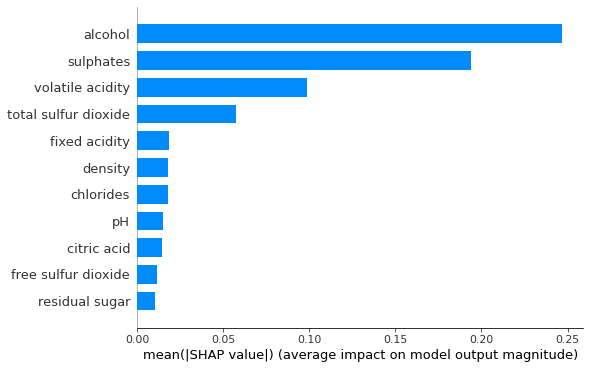

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

* To output another summary plots, remove plot_type.

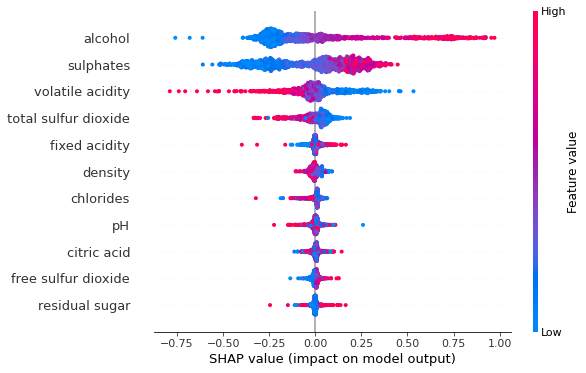

In [ ]:
shap.summary_plot(shap_values, X_train)

**Dissection of above plot:**

* **Feature importance** : Variables are ranked in descending order.
* **Impact** : The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
* **Original value** : Color shows whether that variable is high (in red) or low (in blue) for that observation.
* **Correlation** : A high level of the 'alchohol' content has a high and positive impact on the quality rating. The 'high' comes from the red color, and the 'positive' impact is shown on the X-axis. Similarly, we will say the 'volatile acidity' is negatively correlated with the target variable.

###**(B) SHAP Dependence Plot -- Global Interpretability**

* We can show the partial **dependence plot**, that shows the marginal effect one or two features have on the predicted outcome of a model.
* It tells whether the relationship between the target and a feature is linear, monotonic or more complex.
* In order to create a dependence plot, use **`shap.dependence_plot('alchohol', shap_values, X_train)`**
* The function automatically includes another variable that your chosen variable interact most with.
* The following plot shows there is an approximately linear and positive trend between 'alchohol' and the target variable, and 'alchohol' interacts with 'volatile acidity' frequently.

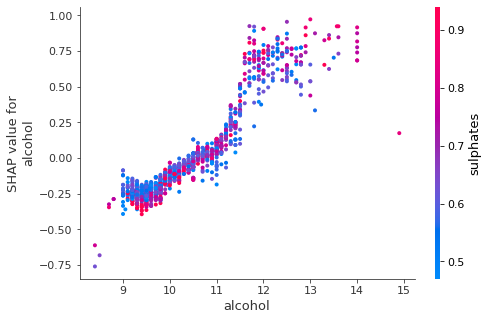

In [ ]:
# We want to know with which variable 'alcohol' interacts most with
shap.dependence_plot('alcohol', shap_values, X_train)

###**(C) Individual SHAP Value Plot -- Local Interpretability**

* In order to see how the SHAP values can be done on individual cases, we'll take randomly chosen few observations and will execute on them.

In [ ]:
#making predictions for test set and storing the predictions in last column along
# with datapoints
X_output = X_test.copy()
X_output.loc[:, 'predict'] = np.round(model.predict(X_output), 2)

#Randomly pick some observations
#picking rows at the gap of 50 points in between
random_picks = np.arange(1, 330, 50)
S = X_output.iloc[random_picks]

In [ ]:
 np.arange(1, 330, 50)

array([  1,  51, 101, 151, 201, 251, 301])

In [ ]:
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
926,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6.00
799,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,5.34
478,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5.41
976,7.2,0.41,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5.12
969,6.7,0.56,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,10.2,5.67
747,8.6,0.33,0.40,2.6,0.083,16.0,68.0,0.99782,3.30,0.48,9.4,5.13
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,4.99


In [ ]:
def shap_plot(j):
  explainerModel = shap.TreeExplainer(model)
  #getting shap values for the sampled 7 points
  shap_values_Model = explainerModel.shap_values(S)
  p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
  return(p)

* The above **shap.force_plot()** takes three values:
  * `explainerModel.expected_value` -- base value
  * `shap_values_Model[j]` -- shap values for the selected data point
  * `S.iloc[[j]]` -- original selected data point.

In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
shap_plot(0)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap.initjs()
shap_plot(1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
X_train.mean()

fixed acidity            8.316810
volatile acidity         0.525637
citric acid              0.274261
residual sugar           2.530219
chlorides                0.086830
free sulfur dioxide     15.786161
total sulfur dioxide    46.436278
density                  0.996753
pH                       3.310289
sulphates                0.659719
alcohol                 10.410295
dtype: float64

**Describing the plot in detail**

* **output value** - prediction for that observation. (From `S` prediction is **6** first point, we got this prediction from RandomForestRegressor).
* **base value** - value that would be predicted if we did not know any features for the current output. In other words, it is the mean prediction, or mean ($\hat{y}$). You can find the same base value for other points as well, as this is the mean prediction taken from Y_test (Y_test.mean()), it'll be same for all.
* **Red/Blue** - Features in the data point that push the prediction higher (to the right) are shows in red, and those pushing the prediction lower are in blue.
* **pH** - pH has a negative impact on the quality rating. A lower than the average pH (3.29 < 3.31) drives the prediction to the right.
* Remember the SHAP model is built on the training data set.

https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

## **Things that the SHAP Values do not do**

* The shap values do not identify causality, which is better identified by experimental design or similar approaches.

## **Shapley Value in Mathematical Form**

Lloyd Shapley came up with this solution concept for a cooperative game in 1953. Shapley wants to calculate the contribution of each player in a coalition game. Assume there are N players and S is a subset of the N players. Let v(S) be the total value of the S players. When player i join the S players, Player i’s marginal contribution is v(S∪{i}) − v(S). If we take the average of the contribution over the possible different permutations in which the coalition can be formed, we get the right contribution of player i:

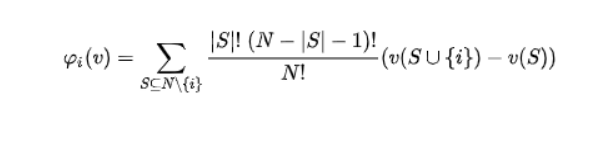

Shapley establishes the following four Axioms in order to achieve a fair contribution:
* Axiom 1: Efficiency. The sum of the Shapley values of all agents equals the value of the total coalition.
* Axiom 2: Symmetry. All players have a fair chance to join the game. That’s why Table A above lists all the permutations of the players.
* Axiom 3: Dummy. If player i contributes nothing to any coalition S, then the contribution of Player i is zero, i.e. , φᵢ(v)=0. Obviously we need to set the boundary value.
* Axiom 4: Additivity. For any pair of games v, w: φ(v+w)=φ(v)+φ(w), where (v+w)(S)=v(S)+w(S) for all S. This property enables us to do the simple arithmetic summation.

I apply the Shapley value calculation to Table (A) to get the marginal contribution:


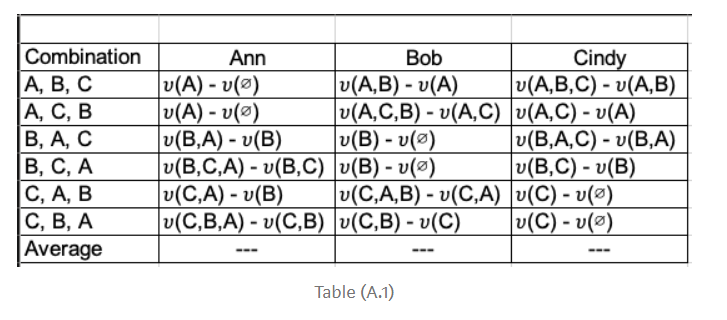

*In real life it is hard to ask the three hammers to take turns repeatedly to record the Shapley values for Table A.
* However, it is quite natural in a machine learning setting. Let’s take either the random forest or gradient boosting algorithm to illustrate this concept.
* Variables enter the machine learning model sequentially or repeatedly in the trees of the model. 
* In every step of tree growing, the algorithms evaluate each of all the variables equally to settle with the variable that contributes the most. 
* Thousands of trees are constructed and it is imaginable that various permutations of the variables will be available.
* Therefore the marginal contribution of each variable can be calculated.

## **How to Generate the Simplified Version?**

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")


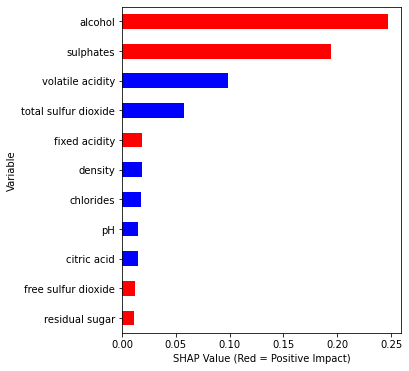

In [ ]:
#Passing shap_values and x_train as input
ABS_SHAP(shap_values,X_train) 